Case 1: Graph of loss, accuracy, em trend with large, medium, and small data.

Plot saved to /home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case10-org-loss-fixed.png
Plot saved to /home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case12-org-bleu-fixed.png


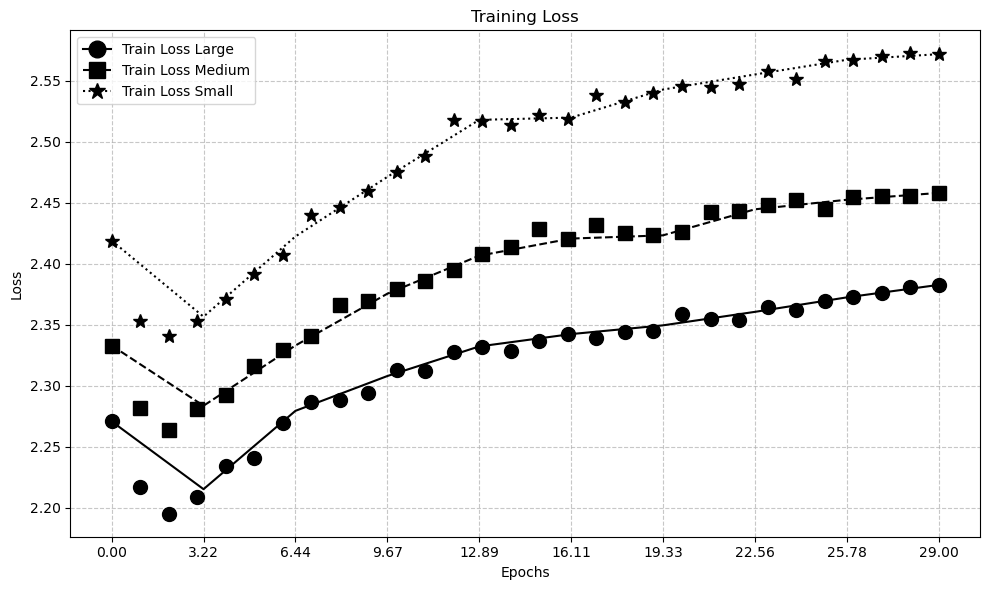

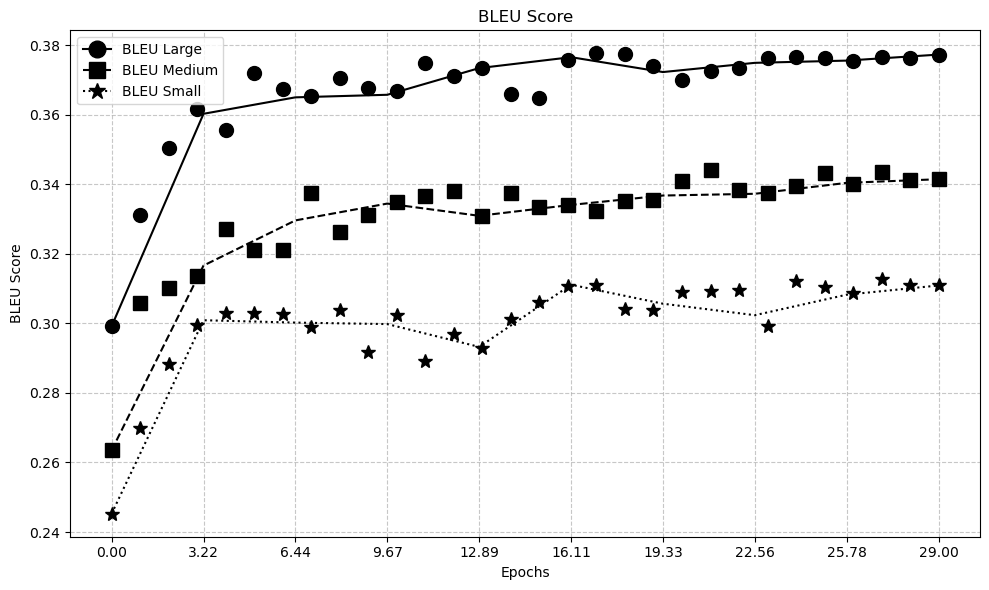

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.lines as mlines

# File paths (update as necessary)
small_csv_file = "/home/user1-system11/Documents/research-shradha/CODE-SPT-Code-TreeSitterV3/SPT-Code/outputs/pre_train_20241114_173013/small_evaluation_metrics.csv"
mid_csv_file = "/home/user1-system11/Documents/research-shradha/CODE-SPT-Code-TreeSitterV3/SPT-Code/outputs/pre_train_20241116_103947/mid_evaluation_metrics.csv"
large_csv_file = "/home/user1-system11/Documents/research-shradha/CODE-SPT-Code-TreeSitterV3/SPT-Code/outputs/pre_train_20241105_105459/large_evaluation_metrics.csv"

# Load data from CSV files with error handling
try:
    small_data = pd.read_csv(small_csv_file)
    mid_data = pd.read_csv(mid_csv_file)
    large_data = pd.read_csv(large_csv_file)
except FileNotFoundError as e:
    print(f"Error loading file: {e}")
    exit(1)

# Extract columns with error handling
def extract_column(data, column_name):
    try:
        return data[column_name].tolist()
    except KeyError:
        print(f"Column '{column_name}' not found in data")
        return []

epochs = extract_column(small_data, "epoch")
train_loss_large = extract_column(large_data, "eval_loss")
train_loss_medium = extract_column(mid_data, "eval_loss")
train_loss_small = extract_column(small_data, "eval_loss")

bleu_large = extract_column(large_data, "eval_bleu")
bleu_medium = extract_column(mid_data, "eval_bleu")
bleu_small = extract_column(small_data, "eval_bleu")

def smooth_data_fixed_points(epochs, data, num_points=10):
    if len(epochs) < 3 or len(data) < 3:
        print("Not enough data for smoothing.")
        return np.array(epochs), np.array(data)
    epochs_new = np.linspace(min(epochs), max(epochs), num_points)  # Fix to num_points
    data_smooth = make_interp_spline(epochs, data)(epochs_new)
    return epochs_new, data_smooth

# Generic plotting function with consistent X-axis points
def plot_metric_fixed_x(
    title, xlabel, ylabel, legend_labels, epochs, data_list, colors, markers, linestyles, save_path=None, grid=True
):
    plt.figure(figsize=(10, 6))
    for data, color, label, marker, linestyle in zip(data_list, colors, legend_labels, markers, linestyles):
        if not data:
            print(f"Skipping empty data for label: {label}")
            continue
        epochs_new, data_smooth = smooth_data_fixed_points(epochs, data, num_points=10)  # Use 10 points for X-axis
        plt.plot(epochs_new, data_smooth, label=label, color=color, linestyle=linestyle)
        plt.plot(epochs, data, marker=marker, linestyle='None', color=color, markersize=10)

    # Custom legend
    custom_legend = [
        mlines.Line2D([], [], color=color, marker=marker, linestyle=linestyle, label=label, markersize=12)
        for color, marker, linestyle, label in zip(colors, markers, linestyles, legend_labels)
    ]
    plt.legend(handles=custom_legend)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.linspace(min(epochs), max(epochs), 10))  # Set 10 evenly spaced ticks
    if grid:
        plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1)
        print(f"Plot saved to {save_path}")

# Loss Plot with fixed X-axis points
plot_metric_fixed_x(
    data_list=[train_loss_large, train_loss_medium, train_loss_small],
    save_path="/home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case10-org-loss-fixed.png",
    legend_labels=["Train Loss Large", "Train Loss Medium", "Train Loss Small"],
    title="Training Loss",
    xlabel="Epochs",
    ylabel="Loss",
    epochs=epochs,
    colors=["black", "black", "black"],
    markers=["o", "s", "*"],
    linestyles=["-", "--", ":"]
)

# BLEU Score Plot with fixed X-axis points
plot_metric_fixed_x(
    data_list=[bleu_large, bleu_medium, bleu_small],
    save_path="/home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case12-org-bleu-fixed.png",
    legend_labels=["BLEU Large", "BLEU Medium", "BLEU Small"],
    title="BLEU Score",
    xlabel="Epochs",
    ylabel="BLEU Score",
    epochs=epochs,
    colors=["black", "black", "black"],
    markers=["o", "s", "*"],
    linestyles=["-", "--", ":"]
)

# # Smoothing function
# def smooth_data(epochs, data):
#     if len(epochs) < 3 or len(data) < 3:
#         print("Not enough data for smoothing.")
#         return np.array(epochs), np.array(data)
#     epochs_new = np.linspace(min(epochs), max(epochs), 80)
#     data_smooth = make_interp_spline(epochs, data)(epochs_new)
#     return epochs_new, data_smooth

# # Generic plotting function
# def plot_metric(title, xlabel, ylabel, legend_labels, epochs, data_list, colors, markers, linestyles, save_path=None, grid=True, tick_frequency=1):
#     plt.figure(figsize=(10, 6))
#     for data, color, label, marker, linestyle in zip(data_list, colors, legend_labels, markers, linestyles):
#         if not data:
#             print(f"Skipping empty data for label: {label}")
#             continue
#         epochs_new, data_smooth = smooth_data(epochs, data)
#         plt.plot(epochs_new, data_smooth, label=label, color=color, linestyle=linestyle)
#         plt.plot(epochs, data, marker=marker, linestyle='None', color=color, markersize=10)

#     # Custom legend
#     custom_legend = [
#         mlines.Line2D([], [], color=color, marker=marker, linestyle=linestyle, label=label, markersize=12)
#         for color, marker, linestyle, label in zip(colors, markers, linestyles, legend_labels)
#     ]
#     plt.legend(handles=custom_legend)
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.xticks(epochs[::tick_frequency])  # Adjust tick frequency
#     if grid:
#         plt.grid(True, linestyle='--', alpha=0.7)
#     plt.tight_layout()
#     if save_path:
#         plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1)
#         print(f"Plot saved to {save_path}")

# # Loss Plot
# plot_metric(
#     data_list=[train_loss_large, train_loss_medium, train_loss_small],
#     save_path="/home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case10-org-loss.png",
#     legend_labels=["Train Loss Large", "Train Loss Medium", "Train Loss Small"],
#     title="Training Loss",
#     xlabel="Epochs",
#     ylabel="Loss",
#     epochs=epochs,
#     colors=["black", "black", "black"],
#     markers=["o", "s", "*"],
#     linestyles=["-", "--", ":"],
#     tick_frequency=2
# )

# # BLEU Score Plot
# plot_metric(
#     data_list=[bleu_large, bleu_medium, bleu_small],
#     save_path="/home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case12-org-bleu.png",
#     legend_labels=["BLEU Large", "BLEU Medium", "BLEU Small"],
#     title="BLEU Score",
#     xlabel="Epochs",
#     ylabel="BLEU Score",
#     epochs=epochs,
#     colors=["black", "black", "black"],
#     markers=["o", "s", "*"],
#     linestyles=["-", "--", ":"],
#     tick_frequency=2
# )


Plot saved to /home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case10-org-loss-even.png
Plot saved to /home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case12-org-bleu-even.png


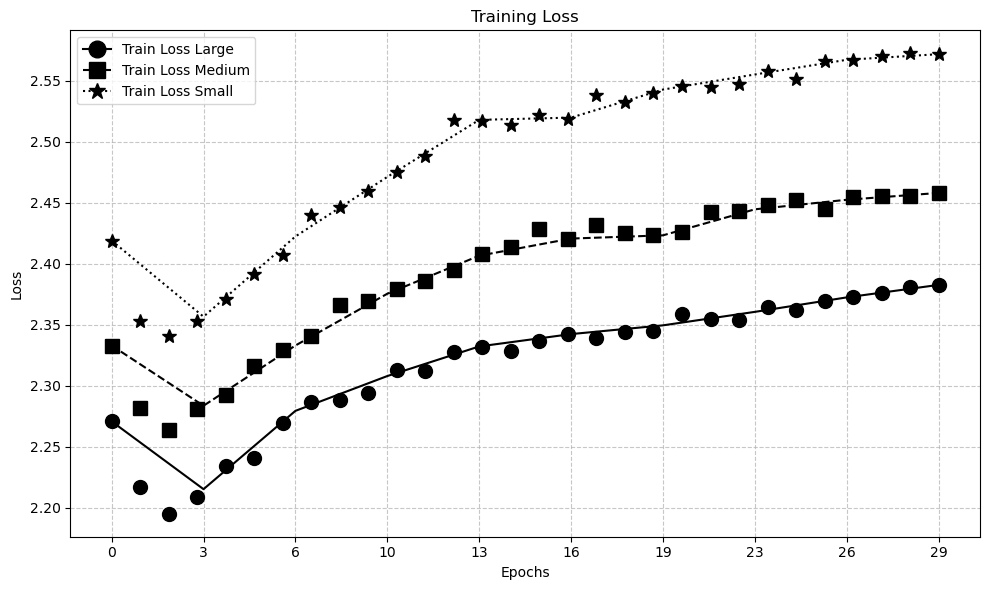

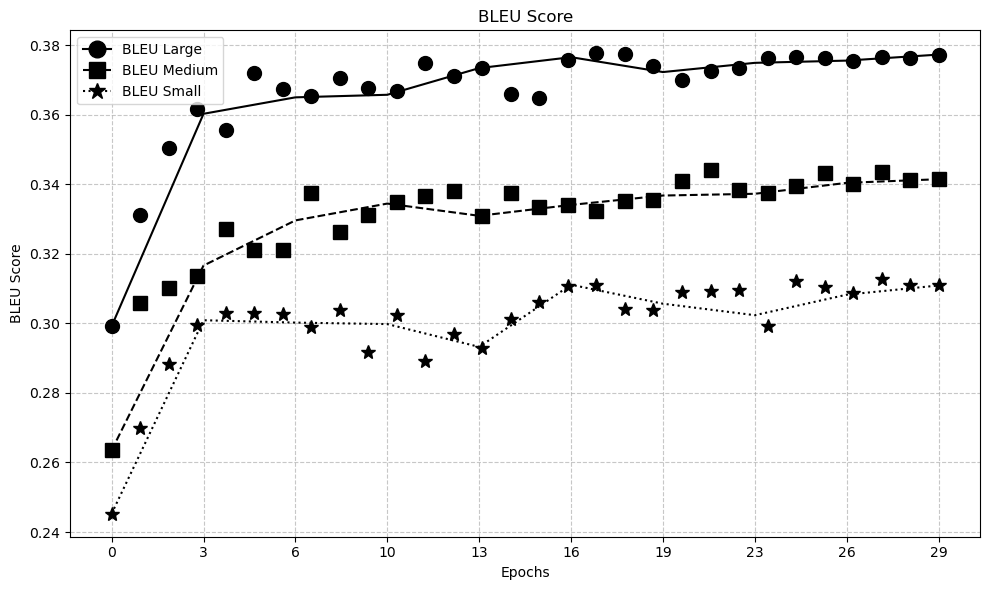

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.lines as mlines

# File paths (update as necessary)
small_csv_file = "/home/user1-system11/Documents/research-shradha/CODE-SPT-Code-TreeSitterV3/SPT-Code/outputs/pre_train_20241114_173013/small_evaluation_metrics.csv"
mid_csv_file = "/home/user1-system11/Documents/research-shradha/CODE-SPT-Code-TreeSitterV3/SPT-Code/outputs/pre_train_20241116_103947/mid_evaluation_metrics.csv"
large_csv_file = "/home/user1-system11/Documents/research-shradha/CODE-SPT-Code-TreeSitterV3/SPT-Code/outputs/pre_train_20241105_105459/large_evaluation_metrics.csv"

# Load data from CSV files with error handling
try:
    small_data = pd.read_csv(small_csv_file)
    mid_data = pd.read_csv(mid_csv_file)
    large_data = pd.read_csv(large_csv_file)
except FileNotFoundError as e:
    print(f"Error loading file: {e}")
    exit(1)

# Extract columns with error handling
def extract_column(data, column_name):
    try:
        return data[column_name].tolist()
    except KeyError:
        print(f"Column '{column_name}' not found in data")
        return []

epochs = extract_column(small_data, "epoch")
train_loss_large = extract_column(large_data, "eval_loss")
train_loss_medium = extract_column(mid_data, "eval_loss")
train_loss_small = extract_column(small_data, "eval_loss")

bleu_large = extract_column(large_data, "eval_bleu")
bleu_medium = extract_column(mid_data, "eval_bleu")
bleu_small = extract_column(small_data, "eval_bleu")

# Smoothing function with fixed number of points for X-axis
def smooth_data_fixed_points(epochs, data, num_points=10):
    if len(epochs) < 3 or len(data) < 3:
        print("Not enough data for smoothing.")
        return np.array(epochs), np.array(data)
    epochs_new = np.linspace(min(epochs), max(epochs), num_points)  # Fix to num_points
    data_smooth = make_interp_spline(epochs, data)(epochs_new)
    return epochs_new, data_smooth

# Generic plotting function with evenly spaced random X-axis ticks
def plot_metric_even_random_x(
    title, xlabel, ylabel, legend_labels, epochs, data_list, colors, markers, linestyles, save_path=None, grid=True
):
    plt.figure(figsize=(10, 6))
    for data, color, label, marker, linestyle in zip(data_list, colors, legend_labels, markers, linestyles):
        if not data:
            print(f"Skipping empty data for label: {label}")
            continue
        epochs_new, data_smooth = smooth_data_fixed_points(epochs, data, num_points=10)  # Use 10 points for X-axis
        plt.plot(epochs_new, data_smooth, label=label, color=color, linestyle=linestyle)
        plt.plot(epochs, data, marker=marker, linestyle='None', color=color, markersize=10)

    # Custom legend
    custom_legend = [
        mlines.Line2D([], [], color=color, marker=marker, linestyle=linestyle, label=label, markersize=12)
        for color, marker, linestyle, label in zip(colors, markers, linestyles, legend_labels)
    ]
    plt.legend(handles=custom_legend)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Select 10 evenly spaced random X-axis ticks
    ticks = np.linspace(min(epochs), max(epochs), 10)  # Generate 10 evenly spaced ticks
    tick_labels = [int(round(tick)) for tick in ticks]  # Convert to integers
    plt.xticks(ticks, tick_labels)  # Apply ticks and labels

    if grid:
        plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1)
        print(f"Plot saved to {save_path}")

# Loss Plot with evenly spaced X-axis ticks
plot_metric_even_random_x(
    title="Training Loss",
    xlabel="Epochs",
    ylabel="Loss",
    legend_labels=["Train Loss Large", "Train Loss Medium", "Train Loss Small"],
    epochs=epochs,
    data_list=[train_loss_large, train_loss_medium, train_loss_small],
    colors=["black", "black", "black"],
    markers=["o", "s", "*"],
    linestyles=["-", "--", ":"],
    save_path="/home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case10-org-loss-even.png"
)

# BLEU Score Plot with evenly spaced X-axis ticks
plot_metric_even_random_x(
    title="BLEU Score",
    xlabel="Epochs",
    ylabel="BLEU Score",
    legend_labels=["BLEU Large", "BLEU Medium", "BLEU Small"],
    epochs=epochs,
    data_list=[bleu_large, bleu_medium, bleu_small],
    colors=["black", "black", "black"],
    markers=["o", "s", "*"],
    linestyles=["-", "--", ":"],
    save_path="/home/user1-system11/Documents/research-shradha/CODE-SPT-Code/Graph/case12-org-bleu-even.png"
)


Plot saved to ../figure/case10-org-loss.png
Plot saved to ../figure/case11-org-em.png
Plot saved to ../figure/case12-org-bleu.png


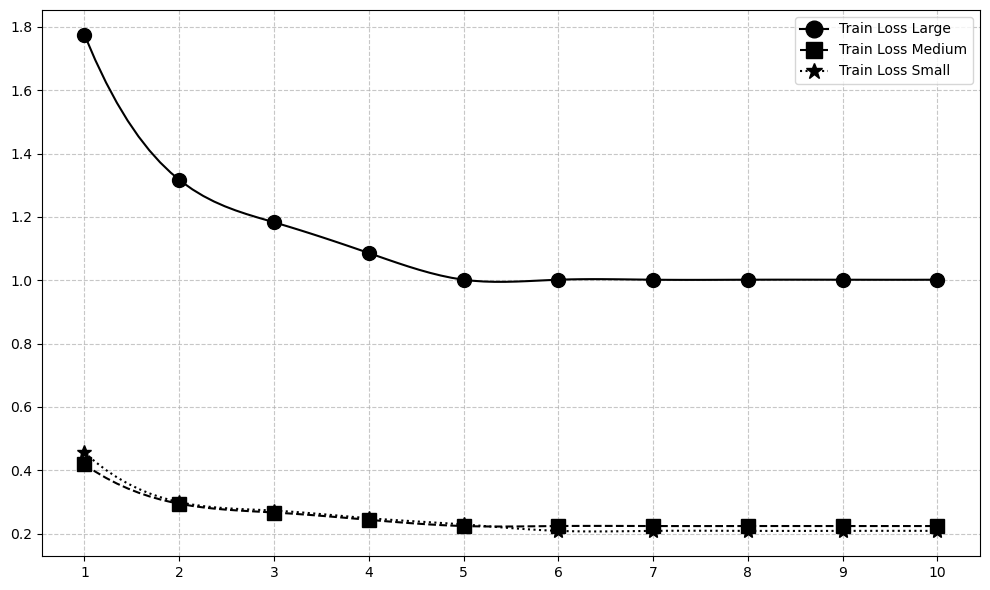

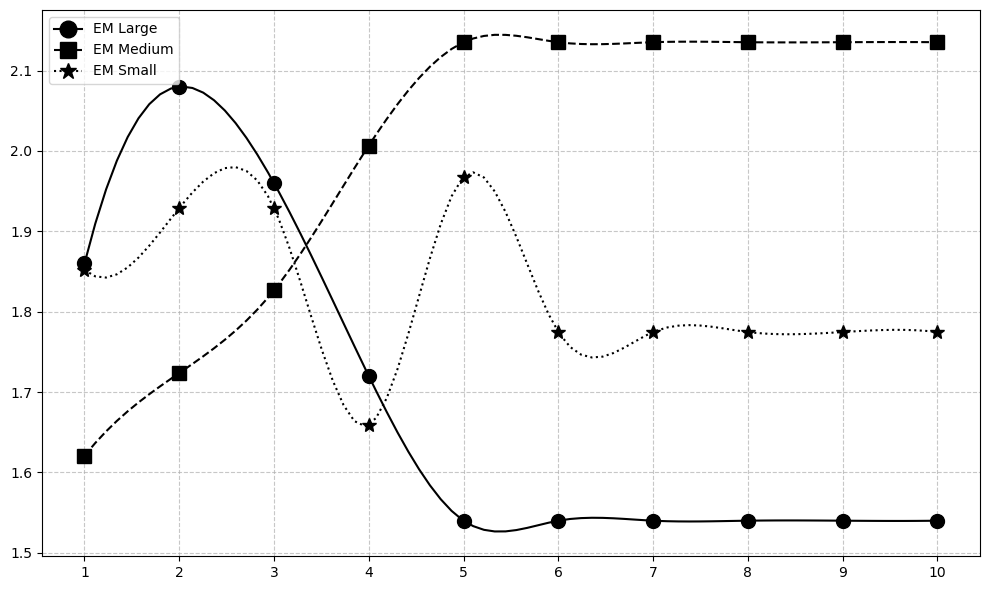

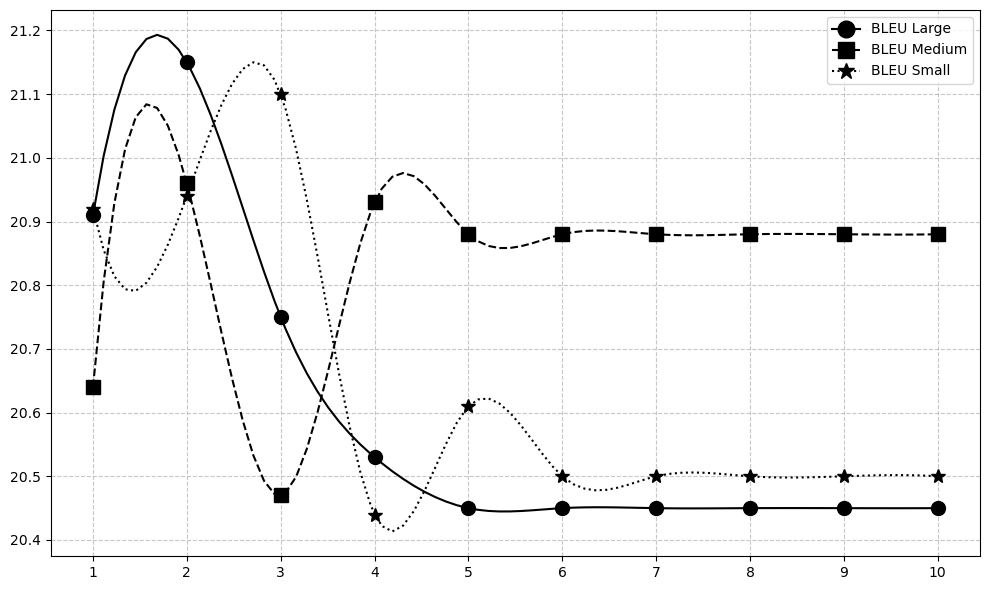

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.lines as mlines

epochs = list(range(1, 11))

# Training loss data
train_loss_large = [1.7752, 1.3172, 1.1832, 1.0861, 1.0018, 1.0018, 1.0018, 1.0018, 1.0018, 1.0018]
train_loss_medium = [0.4184, 0.2943, 0.2666, 0.2436, 0.2239, 0.2239, 0.2239, 0.2239, 0.2239, 0.2239]
train_loss_small = [0.4563, 0.2994, 0.2727, 0.2486, 0.2289, 0.2086, 0.2086, 0.2086, 0.2086, 0.2086]

# Exact match (EM) scores
em_large = [1.86, 2.08, 1.96, 1.72, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54]
em_medium = [1.6208, 1.7237, 1.8266, 2.0067, 2.1353, 2.1353, 2.1353, 2.1353, 2.1353, 2.1353]
em_small = [1.8519, 1.929, 1.929, 1.659, 1.9676, 1.7747, 1.7747, 1.7747, 1.7747, 1.7747]

# BLEU scores
bleu_large = [20.91, 21.15, 20.75, 20.53, 20.45, 20.45, 20.45, 20.45, 20.45, 20.45]
bleu_medium = [20.64, 20.96, 20.47, 20.93, 20.88, 20.88, 20.88, 20.88, 20.88, 20.88]
bleu_small = [20.92, 20.94, 21.1, 20.44, 20.61, 20.5, 20.5, 20.5, 20.5, 20.5]

def smooth_data(epochs, data):
    epochs_new = np.linspace(min(epochs), max(epochs), 80)
    data_smooth = make_interp_spline(epochs, data)(epochs_new)
    return epochs_new, data_smooth

def plot_metric(title, xlabel, ylabel, legend_labels, epochs, data_list, colors, markers, linestyles, save_path=None):
    plt.figure(figsize=(10, 6))
    for data, color, label, marker, linestyle in zip(data_list, colors, legend_labels, markers, linestyles):
        epochs_new, data_smooth = smooth_data(epochs, data)
        plt.plot(epochs_new, data_smooth, label=label, color=color, linestyle=linestyle)
        plt.plot(epochs, data, marker=marker, linestyle='None', color=color, markersize=10)

    custom_legend = [
        mlines.Line2D([], [], color=color, marker=marker, linestyle=linestyle, label=label, markersize=12)
        for color, marker, linestyle, label in zip(colors, markers, linestyles, legend_labels)
    ]
    plt.legend(handles=custom_legend)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(epochs)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1)
    print(f"Plot saved to {save_path}")

# Loss
plot_metric(data_list=[train_loss_large, train_loss_medium, train_loss_small],save_path="../figure/case10-org-loss.png",
    legend_labels=["Train Loss Large", "Train Loss Medium", "Train Loss Small"],
    title="",xlabel="",ylabel="",epochs=epochs,colors=["black", "black", "black"],markers=["o", "s", "*"],linestyles=["-", "--", ":"]
)
# EM
plot_metric(data_list=[em_large, em_medium, em_small],save_path="../figure/case11-org-em.png",
    legend_labels=["EM Large", "EM Medium", "EM Small"],
    title="",xlabel="",ylabel="",epochs=epochs,colors=["black", "black", "black"],markers=["o", "s", "*"],linestyles=["-", "--", ":"]
)
# BLEU
plot_metric(data_list=[bleu_large, bleu_medium, bleu_small],save_path="../figure/case12-org-bleu.png",
    legend_labels=["BLEU Large", "BLEU Medium", "BLEU Small"],
    title="",xlabel="",ylabel="",epochs=epochs,colors=["black", "black", "black"],markers=["o", "s", "*"],linestyles=["-", "--", ":"]
)

Case 2: Graph of loss, accuracy, em trend with large, medium, and small data.

Plot saved to ../figure/case13-so-loss.png
Plot saved to ../figure/case14-so-em.png
Plot saved to ../figure/case15-so-bleu.png


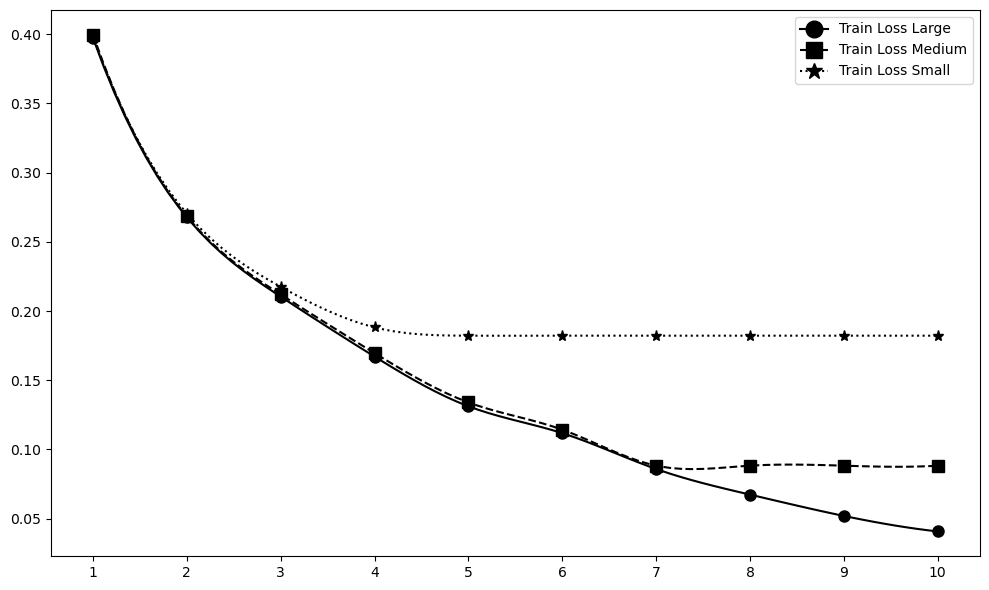

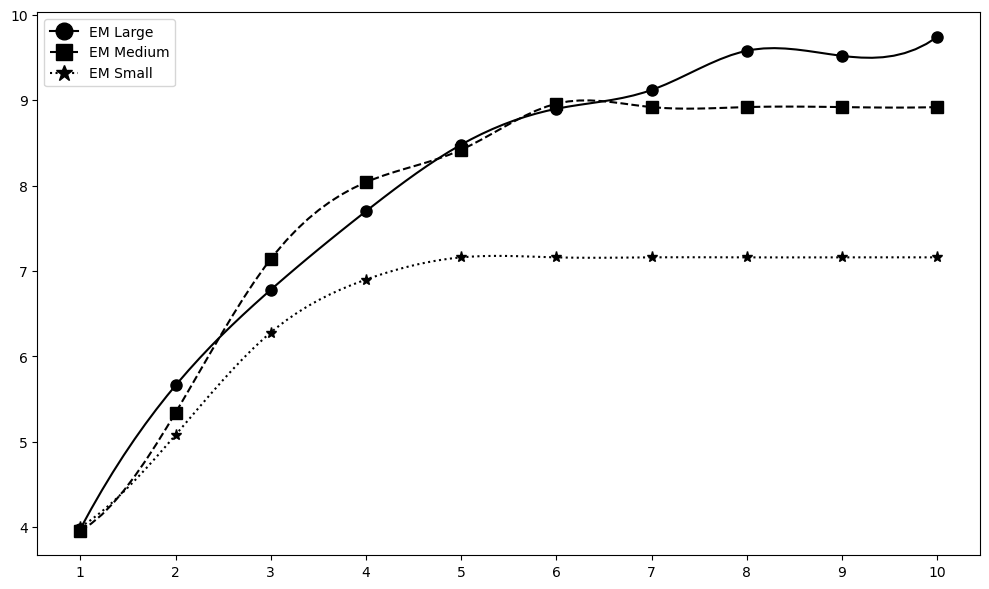

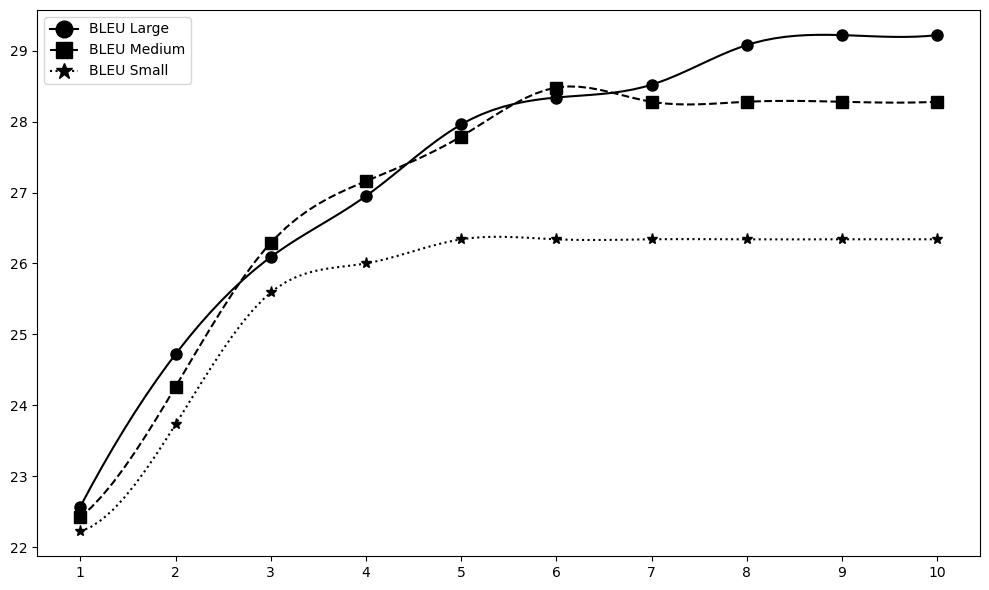

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.lines as mlines

def smooth_data(epochs, data):
    epochs_new = np.linspace(min(epochs), max(epochs), 80)
    data_smooth = make_interp_spline(epochs, data)(epochs_new)
    return epochs_new, data_smooth

def plot_metric(title, xlabel, ylabel, legend_labels, epochs, data_list, colors, markers, linestyles, save_path):
    plt.figure(figsize=(10, 6))
    for data, color, label, marker, linestyle in zip(data_list, colors, legend_labels, markers, linestyles):
        epochs_new, data_smooth = smooth_data(epochs, data)
        plt.plot(epochs_new, data_smooth, label=label, color=color, linestyle=linestyle)
        plt.plot(epochs, data, marker=marker, linestyle='None', color=color, markersize=8)

    custom_legend = [
        mlines.Line2D([], [], color=color, marker=marker, linestyle=linestyle, label=label, markersize=12)
        for color, marker, linestyle, label in zip(colors, markers, linestyles, legend_labels)
    ]
    plt.legend(handles=custom_legend)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(epochs)
    #plt.grid(True, linestyle='--', alpha=0.7)
    plt.grid(False)
    plt.tight_layout()
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1)
    print(f"Plot saved to {save_path}")

# Data for 10 epochs
epochs_10 = list(range(1, 11))
train_loss_data_10 = [
    [1.7752, 1.3172, 1.1832, 1.0861, 1.0018, 1.0018, 1.0018, 1.0018, 1.0018, 1.0018],
    [0.4184, 0.2943, 0.2666, 0.2436, 0.2239, 0.2239, 0.2239, 0.2239, 0.2239, 0.2239],
    [0.4563, 0.2994, 0.2727, 0.2486, 0.2289, 0.2086, 0.2086, 0.2086, 0.2086, 0.2086]
]
em_data_10 = [
    [1.86, 2.08, 1.96, 1.72, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54],
    [1.6208, 1.7237, 1.8266, 2.0067, 2.1353, 2.1353, 2.1353, 2.1353, 2.1353, 2.1353],
    [1.8519, 1.929, 1.929, 1.659, 1.9676, 1.7747, 1.7747, 1.7747, 1.7747, 1.7747]
]
bleu_data_10 = [
    [20.91, 21.15, 20.75, 20.53, 20.45, 20.45, 20.45, 20.45, 20.45, 20.45],
    [20.64, 20.96, 20.47, 20.93, 20.88, 20.88, 20.88, 20.88, 20.88, 20.88],
    [20.92, 20.94, 21.1, 20.44, 20.61, 20.5, 20.5, 20.5, 20.5, 20.5]
]

# Plot for 10 epochs (cases 10, 11, 12)
# plot_metric(
#     title="", xlabel="", ylabel="",
#     legend_labels=["Train Loss Large", "Train Loss Medium", "Train Loss Small"],
#     epochs=epochs_10, data_list=train_loss_data_10,
#     colors=["black", "black", "black"], markers=["o", "s", "*"], linestyles=["-", "--", ":"],
#     save_path="../figure/a-org-loss.png"
# )
# plot_metric(
#     title="", xlabel="", ylabel="",
#     legend_labels=["EM Large", "EM Medium", "EM Small"],
#     epochs=epochs_10, data_list=em_data_10,
#     colors=["black", "black", "black"], markers=["o", "s", "*"], linestyles=["-", "--", ":"],
#     save_path="../figure/e-org-em.png"
# )
# plot_metric(
#     title="", xlabel="", ylabel="",
#     legend_labels=["BLEU Large", "BLEU Medium", "BLEU Small"],
#     epochs=epochs_10, data_list=bleu_data_10,
#     colors=["black", "black", "black"], markers=["o", "s", "*"], linestyles=["-", "--", ":"],
#     save_path="../figure/c-org-bleu.png"
# )

# Data for 26 epochs
epochs_26 = list(range(1, 27))
train_loss_data_26 = [
    [0.3973, 0.2947, 0.2677, 0.2475, 0.2281, 0.2104, 0.1953, 0.1806, 0.1671, 0.1551, 0.1428, 0.1312, 0.1213, 0.1118, 0.1025, 0.0943, 0.0859, 0.0792, 0.0729, 0.0674, 0.0614, 0.0562, 0.052, 0.0478, 0.0442, 0.0408],
    [0.3995, 0.2953, 0.2684, 0.2485, 0.2292, 0.212, 0.1974, 0.183, 0.1696, 0.1576, 0.1453, 0.134, 0.1237, 0.1143, 0.105, 0.0968, 0.0883, 0.0883, 0.0883, 0.0883, 0.0883, 0.0883, 0.0883, 0.0883, 0.0883, 0.0883],
    [0.3977, 0.2956, 0.2704, 0.2492, 0.2324, 0.2175, 0.2055, 0.1959, 0.1882, 0.1822, 0.1822, 0.1822, 0.1822, 0.1822, 0.1822, 0.1822, 0.1822, 0.1822, 0.1822, 0.1822, 0.1822, 0.1822, 0.1822, 0.1822, 0.1822, 0.1822]
]
em_data_26 = [
    [3.98, 4.68, 5.66, 5.78, 6.3, 6.78, 7.18, 7.4, 7.7, 7.82,8.16, 8.48, 8.34, 8.9, 8.42, 8.68, 9.12, 9.12, 9.04, 9.58,9.38, 9.48, 9.52, 9.44, 9.64, 9.74],
    [3.96, 4.88, 5.34, 5.74, 6.26, 7.14, 7.1, 7.48, 8.04, 8.28,8.28, 8.42, 8.52, 8.96, 8.74, 9.12, 8.92, 8.92, 8.92, 8.92,8.92, 8.92, 8.92, 8.92, 8.92, 8.92],
    [4, 4.86, 5.08, 5.7, 6.08, 6.28, 6.86, 6.7, 6.9, 7.16,7.16, 7.16, 7.16, 7.16, 7.16, 7.16, 7.16, 7.16, 7.16, 7.16,7.16, 7.16, 7.16, 7.16, 7.16, 7.16]
]
bleu_data_26 = [
    [22.57, 23.45, 24.72, 25.04, 25.59, 26.09, 26.53, 26.83, 26.95, 27.3,27.45, 27.96, 27.85, 28.34, 27.91, 28.11, 28.52, 28.71, 28.77, 29.08,29.13, 29.21, 29.22, 29.11, 29.11, 29.22],
    [22.42, 23.47, 24.26, 25, 25.47, 26.29, 26.36, 26.86, 27.16, 27.64,27.8, 27.79, 28.05, 28.48, 28.17, 28.21, 28.28, 28.28, 28.28, 28.28,28.28, 28.28, 28.28, 28.28, 28.28, 28.28],
    [22.22, 23.29, 23.73, 25.03, 25.13, 25.59, 25.83, 25.97, 26, 26.34,26.34, 26.34, 26.34, 26.34, 26.34, 26.34, 26.34, 26.34, 26.34, 26.34,26.34, 26.34, 26.34, 26.34, 26.34, 26.34]
]

# Function to sort and select evenly spaced indices
def downsample_data(data, num_points=10):
    indices = np.linspace(0, len(data) - 1, num_points, dtype=int)
    return [data[i] for i in indices]

train_loss_data_26 = [downsample_data(dataset, 10) for dataset in train_loss_data_26]
em_data_26 = [downsample_data(dataset, 10) for dataset in em_data_26]
bleu_data_26 = [downsample_data(dataset, 10) for dataset in bleu_data_26]

# Plot for 26 epochs (cases 13, 14, 15)
plot_metric(
    title="", xlabel="", ylabel="",
    legend_labels=["Train Loss Large", "Train Loss Medium", "Train Loss Small"],
    epochs=epochs_10, data_list=train_loss_data_26,
    colors=["black", "black", "black"], markers=["o", "s", "*"], linestyles=["-", "--", ":"],
    save_path="../figure/case13-so-loss.png"
)
plot_metric(
    title="", xlabel="", ylabel="",
    legend_labels=["EM Large", "EM Medium", "EM Small"],
    epochs=epochs_10, data_list=em_data_26,
    colors=["black", "black", "black"], markers=["o", "s", "*"], linestyles=["-", "--", ":"],
    save_path="../figure/case14-so-em.png"
)
plot_metric(
    title="", xlabel="", ylabel="",
    legend_labels=["BLEU Large", "BLEU Medium", "BLEU Small"],
    epochs=epochs_10, data_list=bleu_data_26,
    colors=["black", "black", "black"], markers=["o", "s", "*"], linestyles=["-", "--", ":"],
    save_path="../figure/case15-so-bleu.png"
)
